# Homework Assignment: Deep Neural Network Classification with Fashion MNIST



## Import data

In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

from IPython.display import Markdown
from importlib import reload
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-06-12 21:34:22.835745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-12 21:34:22.841811: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-12 21:34:22.841990: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

True

In [11]:
data = keras.datasets.fashion_mnist
cifar10_data = data . load_data ()

## Train and Test 

In [12]:
(train_images, train_labels),(test_images, test_labels) = cifar10_data

Nombre de labels

In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
print("train_images shape : ",train_images.shape)

print("train_labels size", len(train_labels))

print("train_labels",train_labels)

print("test_images shape : ",test_images.shape)

print("test_labels",test_labels)

train_images shape :  (60000, 28, 28)
train_labels size 60000
train_labels [9 0 0 ... 3 0 5]
test_images shape :  (10000, 28, 28)
test_labels [9 2 1 ... 8 1 5]


## Image visualisation

In [15]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

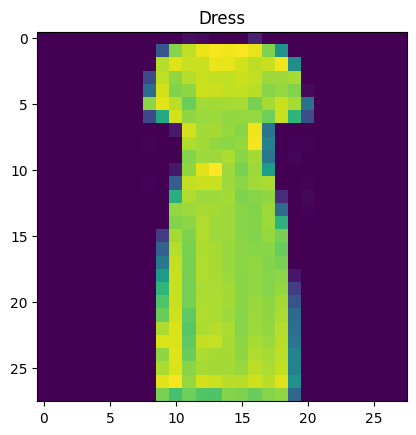

3

In [16]:
index = 50
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title(class_names[train_labels[index]])
plt.show()

train_labels[index]

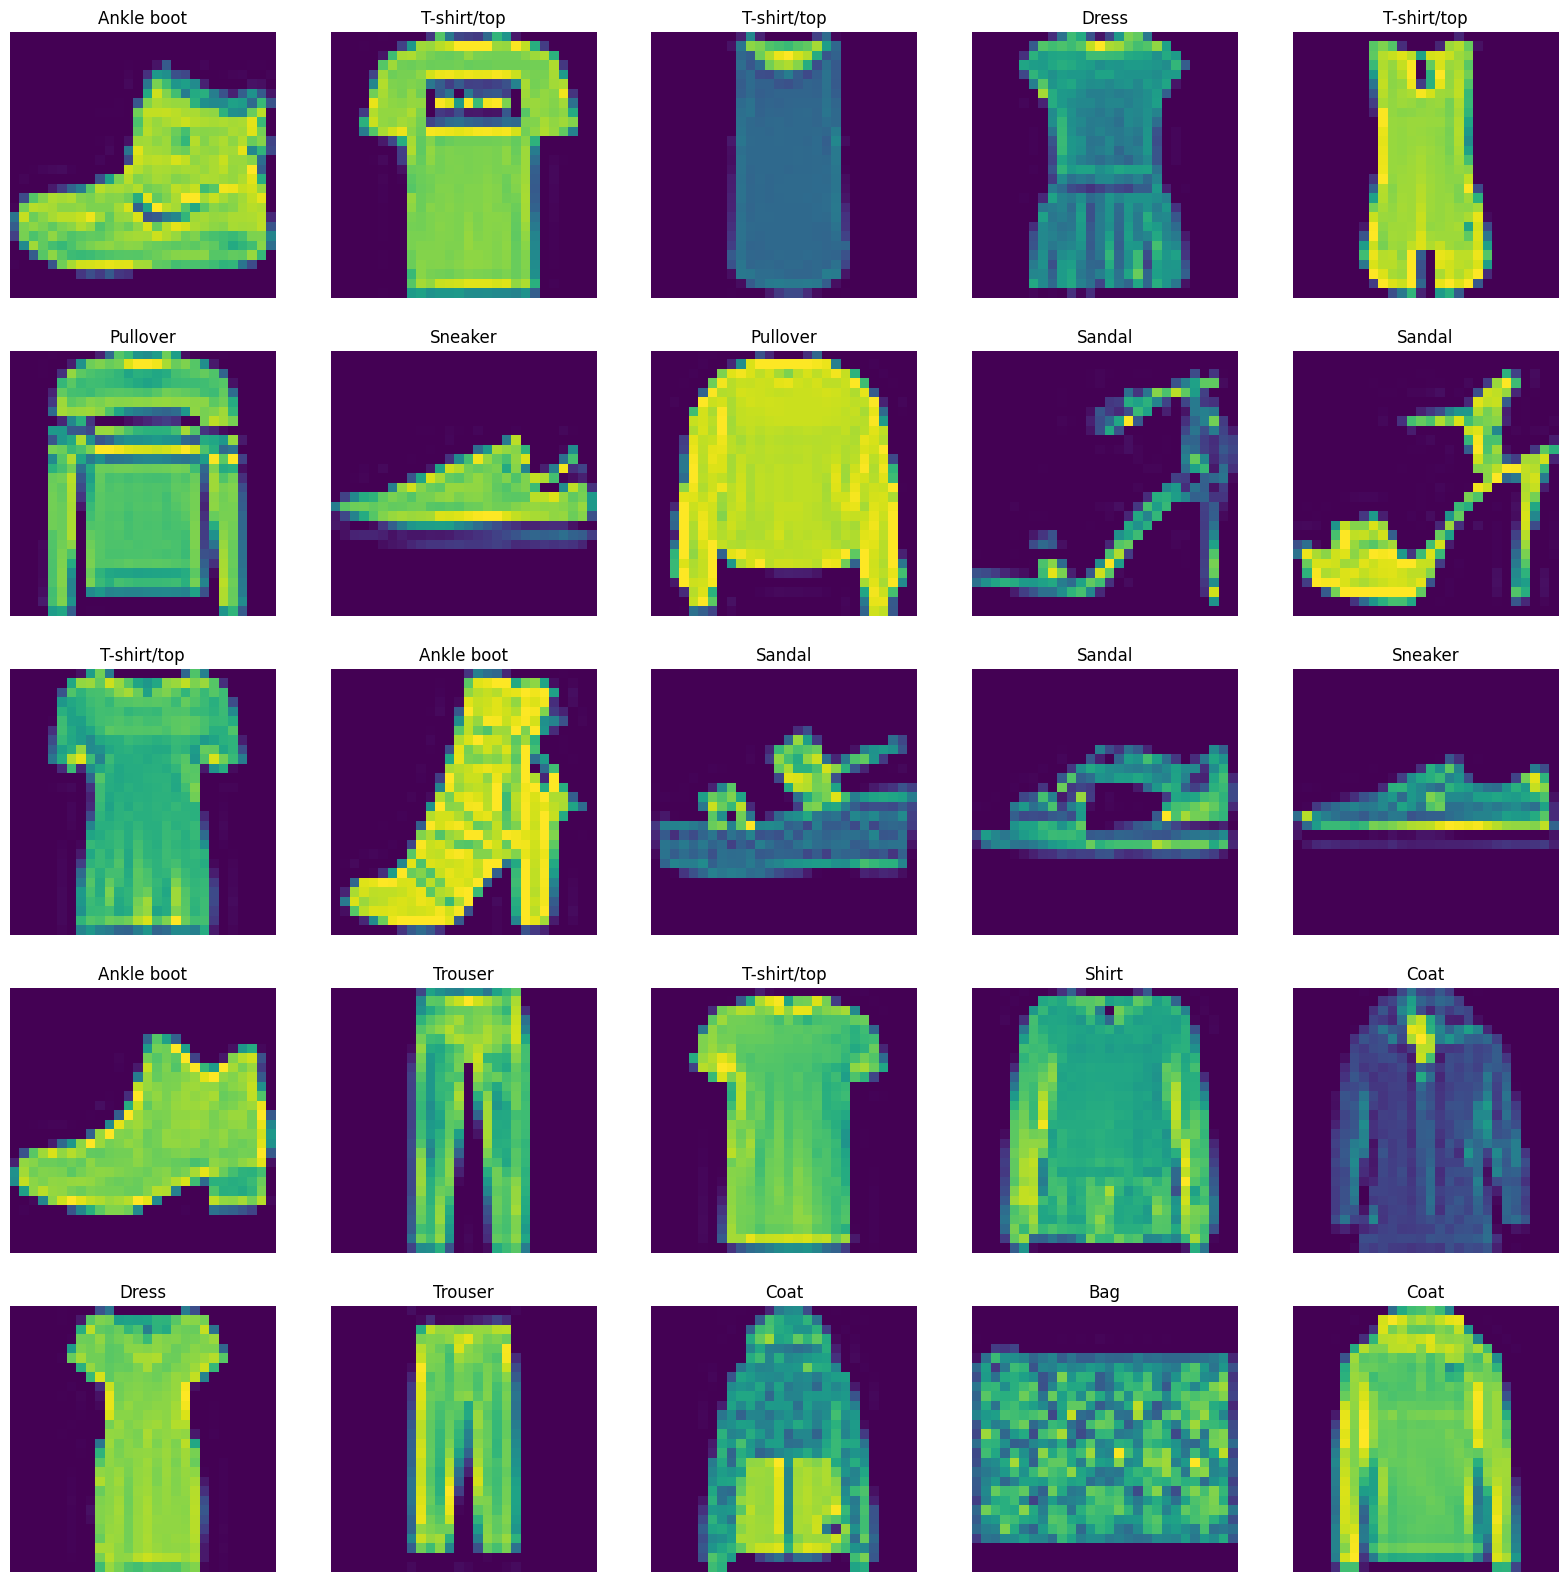

In [17]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)  
    plt.imshow(train_images[i]) 
    plt.title(class_names[int(train_labels[i])])  
    plt.axis('off') 

plt.show()

## Dataset Normalization

In [18]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [19]:
train_images[0].shape

(28, 28)

## Model

In [24]:

from keras import models
from keras import layers
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax') 
])

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [25]:
es = EarlyStopping(monitor="val_loss",patience=20)
mc = ModelCheckpoint("model_best.h5",save_best_only=True)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [26]:
history=model.fit(train_images,train_labels,epochs=200,batch_size=128,validation_split=0.2,validation_data=(test_images,test_labels),callbacks=[es,mc])

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.6381 - accuracy: 0.7707 - val_loss: 0.4371 - val_accuracy: 0.8429
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.4409 - accuracy: 0.8399 - val_loss: 0.3973 - val_accuracy: 0.8564
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3973 - accuracy: 0.8571 - val_loss: 0.3769 - val_accuracy: 0.8662
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3756 - accuracy: 0.8644 - val_loss: 0.3697 - val_accuracy: 0.8674
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3553 - accuracy: 0.8705 - val_loss: 0.3577 - val_accuracy: 0.8710
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3442 - accuracy: 0.8734 - val_loss: 0.3519 - val_accuracy: 0.8738
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3340 - accuracy: 0.8772 - val_loss: 0.3438 - val_accuracy: 0.8766

## Evaluate the model

In [15]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4919 - accuracy: 0.8359

Test accuracy: 0.8359000086784363


## Prediction

In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [17]:
print(np.argmax(predictions,axis=1)[0],test_labels[0])
print(np.argmax(predictions,axis=1)[1],test_labels[1])
print(np.argmax(predictions,axis=1)[2],test_labels[2])


9 9
2 2
1 1


## Check Predicted Labels

In [18]:
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label = int(true_label)
    predicted_label = np.argmax(predictions_array)
    
    plt.imshow(img)
    
    title_color = 'blue' if predicted_label == true_label else 'red'
    
    plt.title(f'Predicted: {class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\nActual: {class_names[true_label]}', color=title_color)
    
    plt.axis('off')


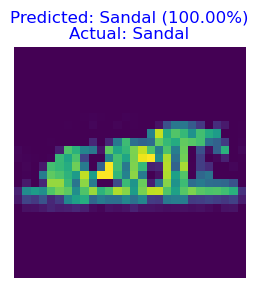

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
import math
import random
i = random.randint(0,test_images.shape[0])
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels[i], test_images[i],class_names)
#green if the prediction is correct, red if incorrect


plt.show()
predictions[i]

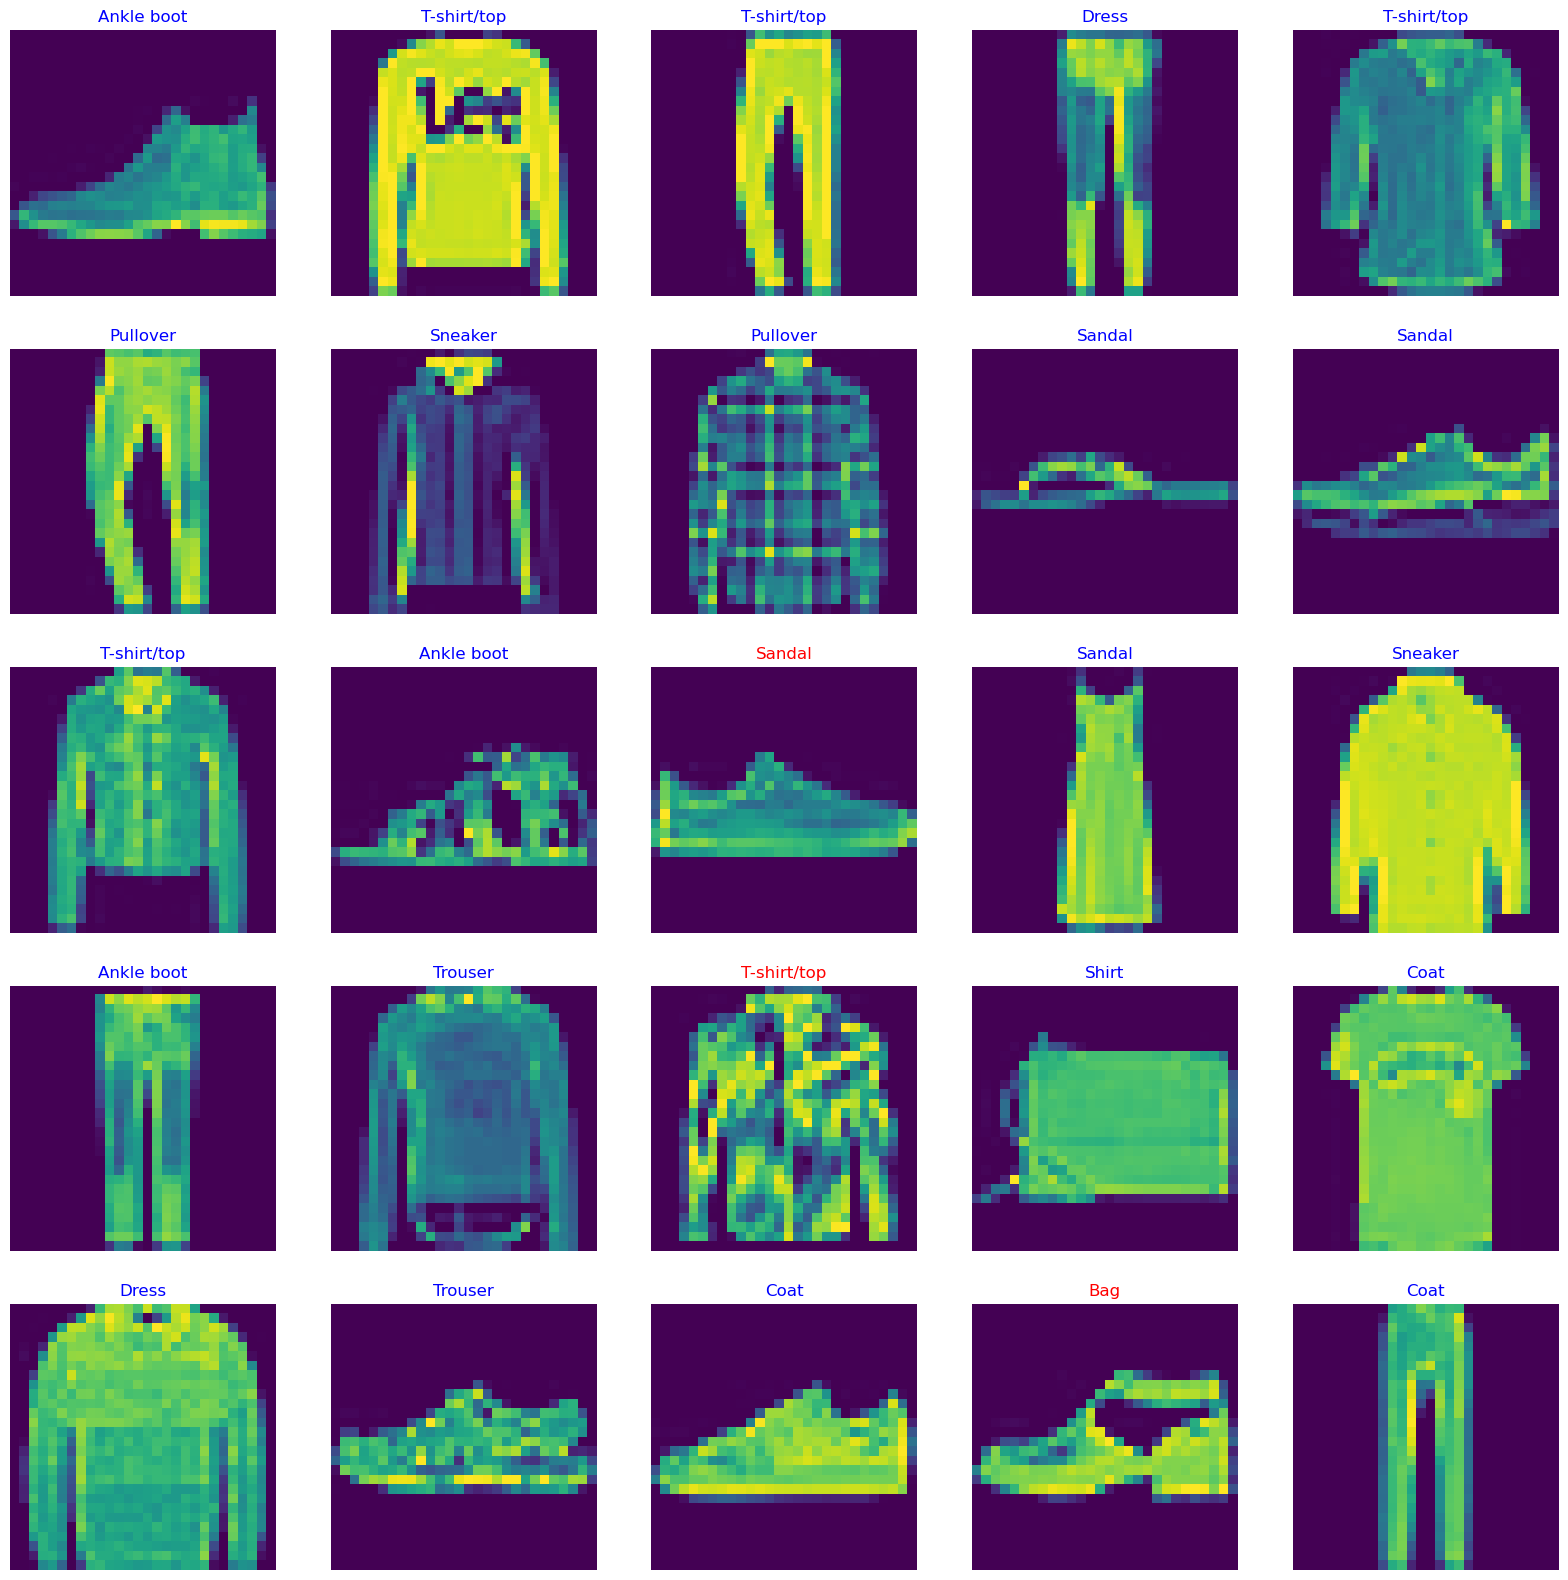

In [20]:
plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)  
    plot_image(i, predictions[i], test_labels[i], test_images[i],class_names)
    plt.title(class_names[int(train_labels[i])])  
    plt.axis('off') 

In [ ]:
az vm extension set --resource-group [sandbox resource group name] --vm-name my-vm --name customScript --publisher Microsoft.Azure.Extensions --version 2.1 --settings '{"fileUris":["https://raw.githubusercontent.com/MicrosoftDocs/mslearn-welcome-to-azure/master/configure-nginx.sh"]}' --protected-settings '{"commandToExecute": "./configure-nginx.sh"}'